<a href="https://colab.research.google.com/github/Caroline-An/Analise-de-dados-RH-IBM/blob/main/analise_rh_ibm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introdução ao projeto**

Projeto inicial de testes para praticar análise de dados com Python.

Este projeto foi realizado utilizando a base de dados do RH do IBM que se encontra disponível no site www.kaggle.com.

## **2. Objetivos do projeto**

1.   Compreender o perfil das pessoas que deixam a empresa;
2.   Item da lista





### **2.1 Compreender o perfil das pessoas que deixam a empresa**

Alcançando este objetivo será possível identificar pessoas que ainda estão na empresa e se encaixam neste(s) perfil(s) de modo que se torne possível criar estratégias que influenciem positivamente para a permanência destes indivíduos, diminuindo a rotatividade de funcionários que pode ser um mal indicador para o mercado.

Perguntas a serem respondidas para alcançar o objetivo:

* Existe disparidade salarial entre homens e mulheres?
* Qual faixa etária é mais proeminente na análise?
* Quais setores tiveram as maiores taxas de saída?
* Qual a relação entre salário e departamento?

## **3. Carregando Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mtp

mtp.style.use('ggplot')

## **4. Carregando Dataset**

Estou utilizando um dataset do kraggle.com que fiz o download e subi para a página do projeto no github, desse modo eu pego o link externo, atribuo ele a uma variável "url" e a leio em seguida.

In [ ]:
url = 'https://raw.githubusercontent.com/Caroline-An/Analise-de-dados-RH-IBM/main/database/WA_Fn-UseC_-HR-Employee-Attrition.csv'
rh = pd.read_csv(url)

In [ ]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## **5. Iniciando as análises**
> ### **5.1 Verificando se existe disparidade salarial entre gêneros**
A primeira análise a ser feita será a distribuição de salários em média.



Text(0, 0.5, 'Quantidade de Funcionários')

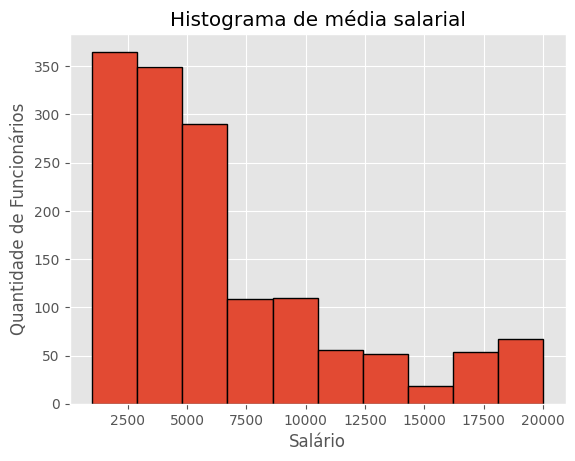

In [ ]:
mtp.hist(rh.MonthlyIncome, edgecolor='black', linewidth=1)
mtp.title('Histograma de média salarial')
mtp.xlabel('Salário')
mtp.ylabel('Quantidade de Funcionários')

**1ª Inferência** - Verifica-se que a maioria dos funcionários recebem salários entre 2500 e 7500, sendo pouco mais de cinquenta funcionários que recebem acima de 15000.

Agora vamos observar a quantidade de funcionários que se identificam com os gêneros masculino ou feminino na empresa.

In [ ]:
quantidade_por_genero = rh.Gender.value_counts()
porcentagem_por_genero = rh.Gender.value_counts(1)

print(quantidade_por_genero)
print(porcentagem_por_genero)

Male      882
Female    588
Name: Gender, dtype: int64
Male      0.6
Female    0.4
Name: Gender, dtype: float64


**2ª Inferência** - O resultado da busca obteve 882 funcionários do gênero masculino, e 588 do gênero feminino, demonstrando que 60% da empresa é formada por homens e 40% por mulheres.

Iremos então verificar qual a média salárial dos dois grupos.

Gender
Female    6686.566327
Male      6380.507937
Name: MonthlyIncome, dtype: float64


<Axes: xlabel='Gender'>

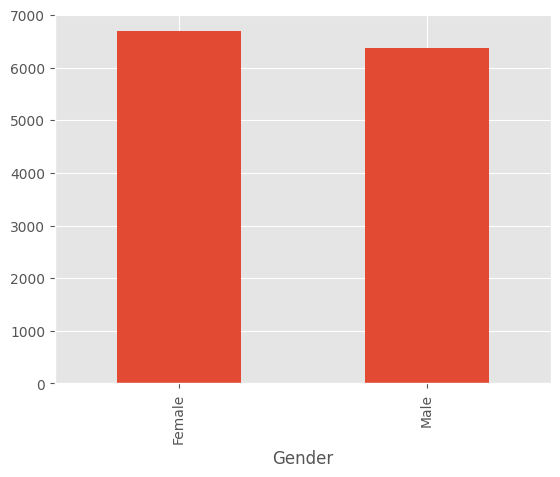

In [ ]:
salario_por_genero = rh.groupby('Gender')['MonthlyIncome'].mean(1)
print(salario_por_genero)
salario_por_genero.plot.bar()

**3ª Inferência** - Embora a empresa seja formada majoritariamente formada por homens a média salarial das mulheres é maior, porém isso não significa que a maioria delas recebem mais, a média pode ter sido puxada para cima ou para baixo por haver um outlier negativo ou positivo, é isso que verificaremos a seguir.

KeyError: ignored